# Importing All Required Libraries

In [99]:
import numpy as np; #importing numerical lib
import pandas as pd; #handling data in form of row and columns
import seaborn as sns; #importing seaborn for statstical plots
import matplotlib.pyplot as plt; #importing ploting liabries

#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
import warnings
warnings.filterwarnings('ignore')

#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore

# Load the dataset

In [100]:
vehdf=pd.read_csv('vehicle.csv')
vehdf.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [3]:
vehdf.tail(10)

compactness  circularity  distance_circularity  radius_ratio  \
836           87         45.0                  66.0         139.0   
837           94         46.0                  77.0         169.0   
838           95         43.0                  76.0         142.0   
839           90         44.0                  72.0         157.0   
840           93         34.0                  66.0         140.0   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
836                  58.0                        8          140.0   
837                  60.0                        8          158.0   
838                  57.0                       10          151.0   
839                  64.0                        8          137.0   
840                  56.0                        7          130.0   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
836           47.0                    18.0                        148   
837           42.0                    20.0                        148   
838           44.0                    19.0                        149   
839           48.0                    18.0                        144   
840           51.0                    18.0                        120   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
836            168.0              294.0                      175.0   
837            181.0              373.0                      181.0   
838            173.0              339.0                      159.0   
839            159.0              283.0                      171.0   
840            151.0              251.0                      114.0   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
836                         73.0             3.0              12.0   
837                         67.0            12.0               2.0   
838                         71.0             2.0              23.0   
839                         65.0             9.0               4.0   
840                         62.0             5.0              29.0   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
836             188.0            196   van  
837             193.0            199   car  
838 

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
columns = vehdf.columns
print(columns)

vehdf['class'] = le.fit_transform(vehdf['class'])
print(vehdf.shape)


Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')
(846, 19)


# Exploratory data quality report

In [4]:
#To get information of null in columns and total entries per column
vehdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

#### Quick Insights

    1.compactness,  max.length_aspect_ratio,max.length_rectangularity, hollows_ratio, class has no missing values rest all features are having some kind of missing values
    2.All columns has numeric values


## Identifying mising values

In [40]:
from sklearn.impute import SimpleImputer #to impute missing values
newdf = vehdf.copy()

X = newdf.iloc[:,0:19] #separting all numercial independent attribute

imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1) #fill missing values with median column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)

newdf = pd.DataFrame(transformed_values, columns = column )
newdf.describe()



Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean         188.918440     195.632388    0.977541  
std            6.152247       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

In [47]:
print('Original null values count\n', vehdf.isnull().sum())
print("\n\nCount after we imputed the NaN value:\n", newdf.isnull().sum())

Original null values count
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


Count after we imputed the NaN value:
 compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity     

##### Observation: 
we can see that the missing NaN values from our orginal vehdf datframe columns are treated and replaced using median strategy.

## Descriptive statistical summary
describe() Function gives the mean, std and IQR values. It excludes character column and calculate summary statistics only for numeric columns.

In [49]:
newdf.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

##### Observation
Compactness, circularity has mean and median values almost similar , it signifies that it is normally distributed and has no skewness/outlier

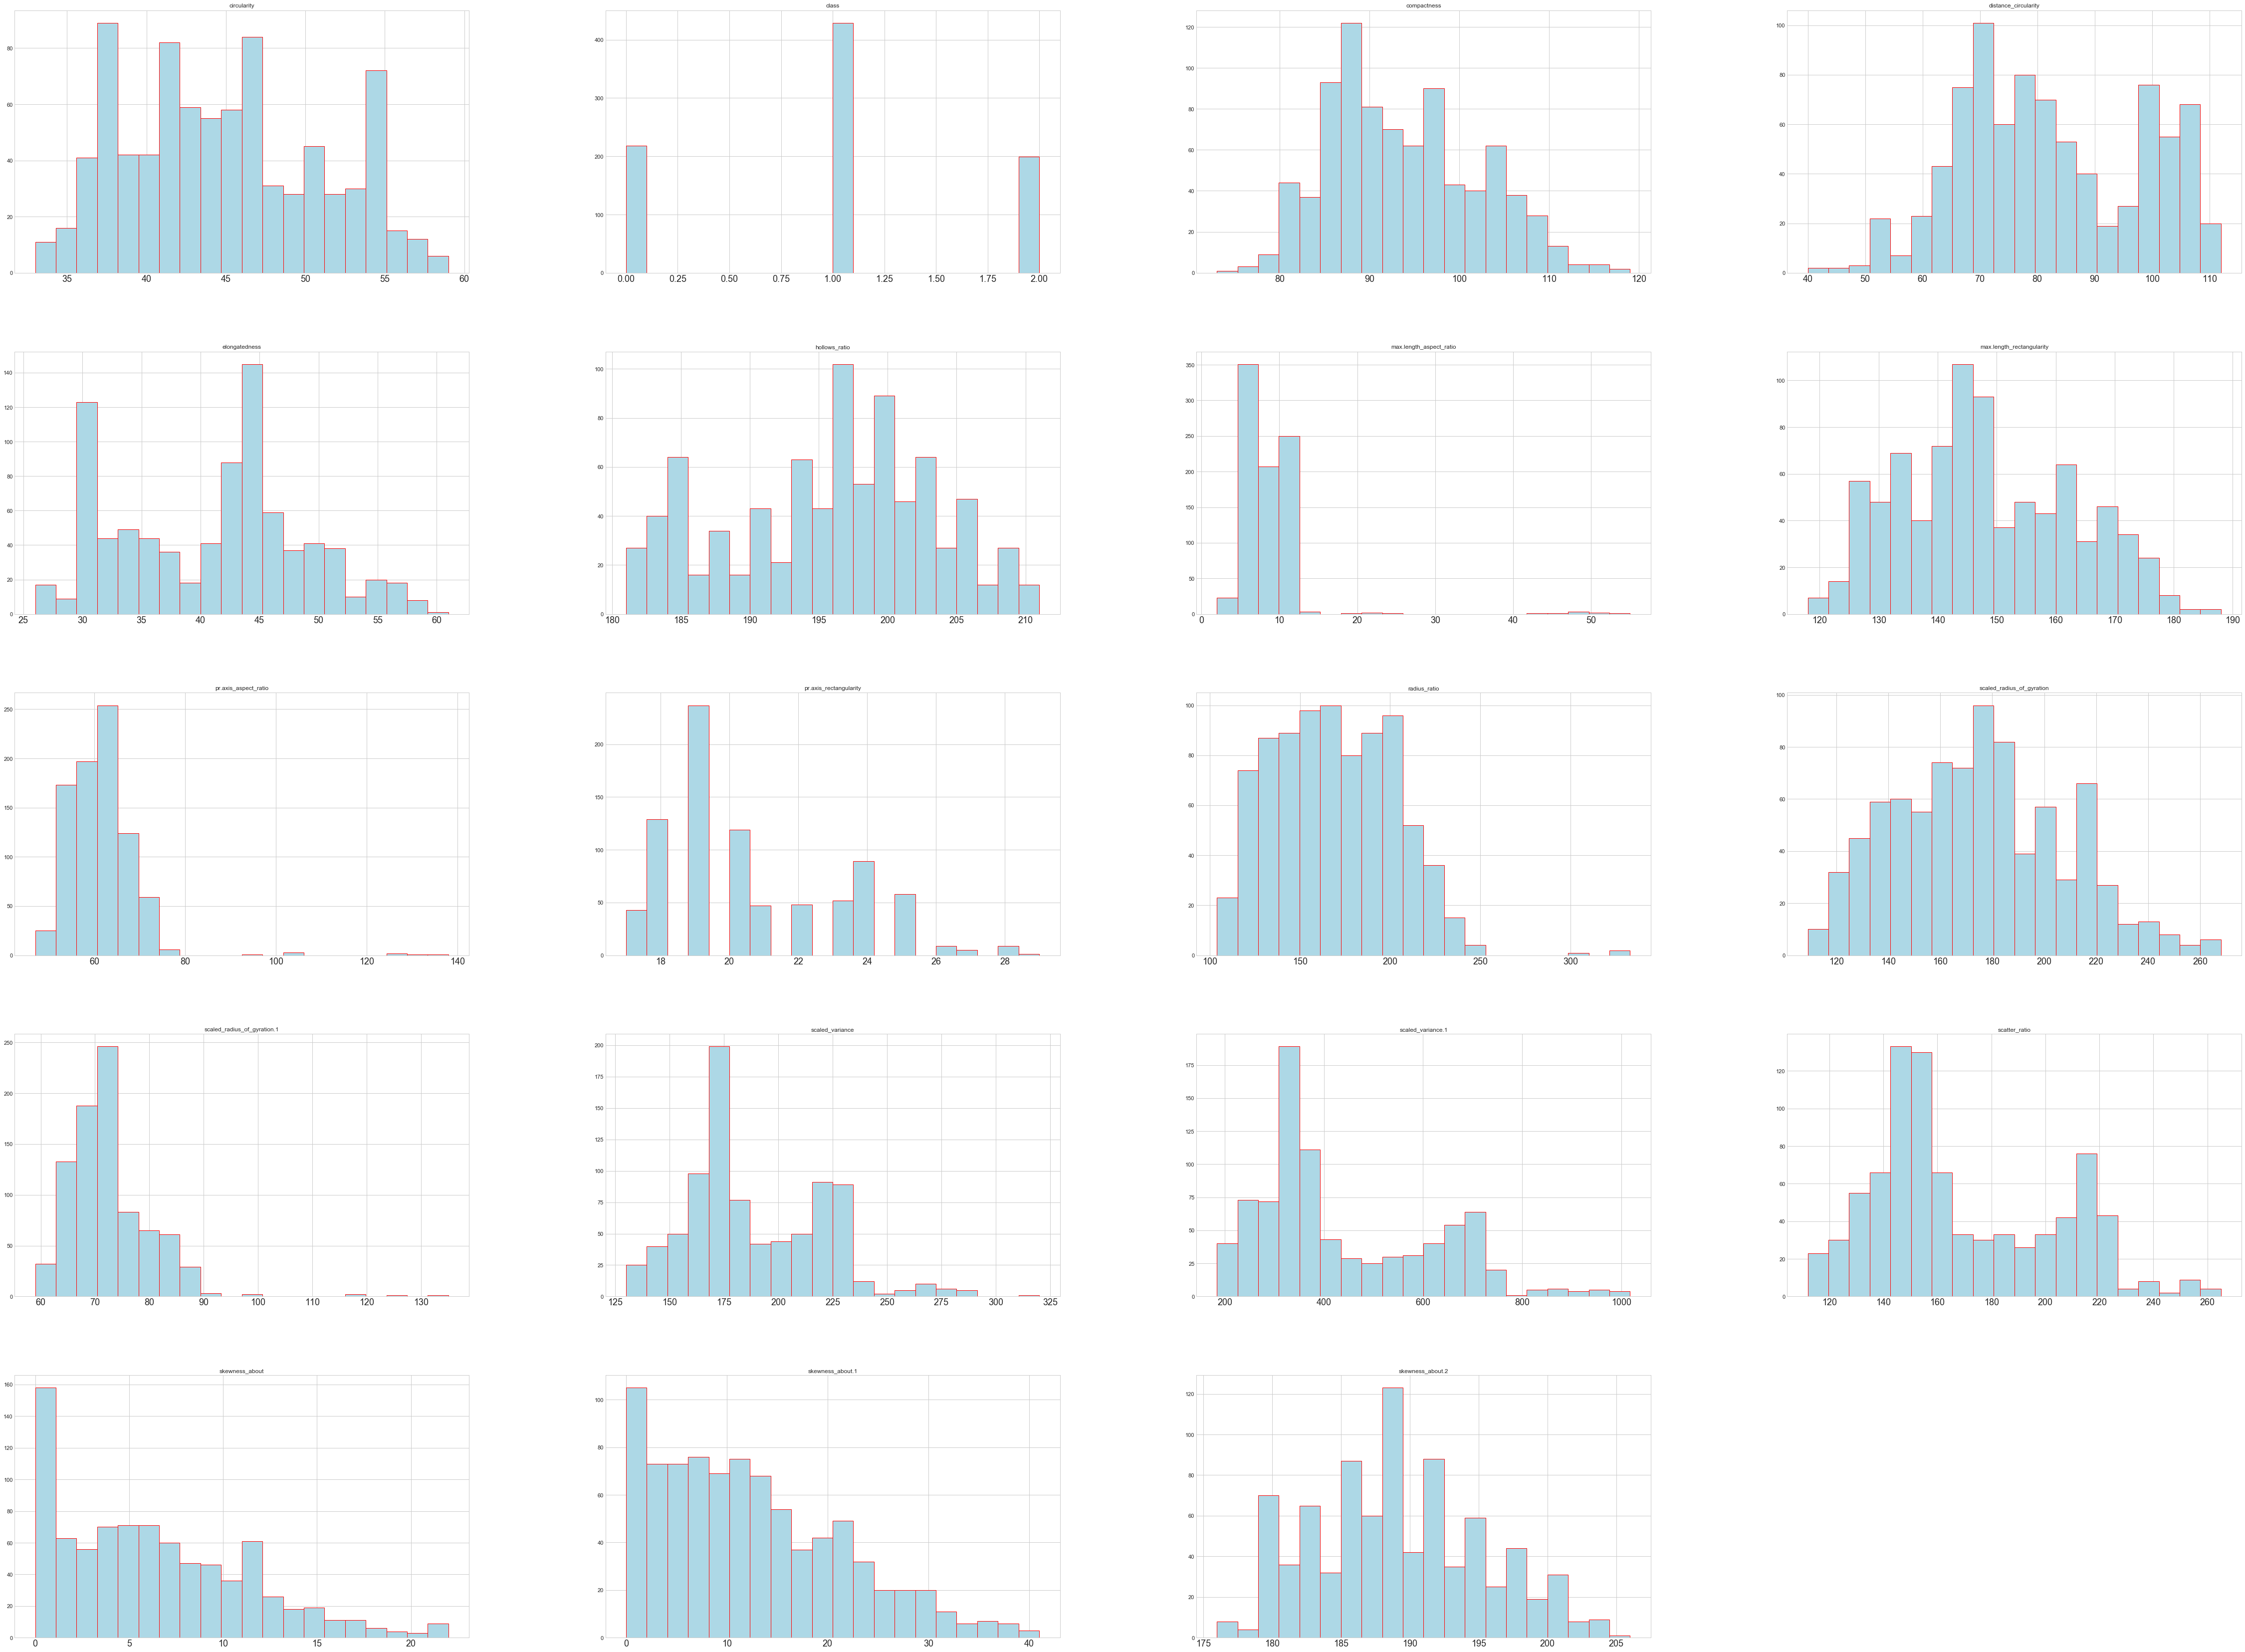

In [64]:
#plt.style.use('seaborn-whitegrid')


newdf.hist(bins=20, figsize=(80,60),color='lightblue',edgecolor='red', xlabelsize=18)
plt.show()


#### Observation:
Most of the data attributes seems to be normally distributed
scaled valriance 1 and skewness about 1 and 2, scatter_ratio, seems to be right skwed .

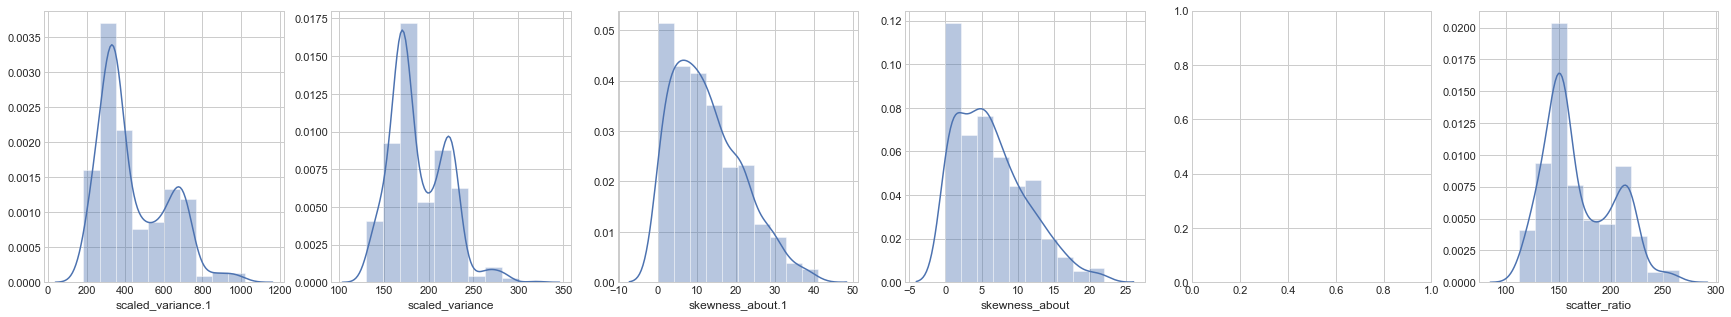

In [69]:
fig, ax=plt.subplots(1,6,figsize=(30,5))
vis1 = sns.distplot(newdf["scaled_variance.1"],bins=10, ax= ax[0])
vis2 = sns.distplot(newdf["scaled_variance"],bins=10, ax=ax[1])
vis3 = sns.distplot(newdf["skewness_about.1"],bins=10, ax= ax[2])
vis4 = sns.distplot(newdf["skewness_about"],bins=10, ax=ax[3])
vis6 = sns.distplot(newdf["scatter_ratio"],bins=10, ax=ax[5])

fig.savefig('subplot.png')

In [71]:
skewValue = newdf.skew()
print("skewValue of dataframe attributes:\n", skewValue)

skewValue of dataframe attributes:
 compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64


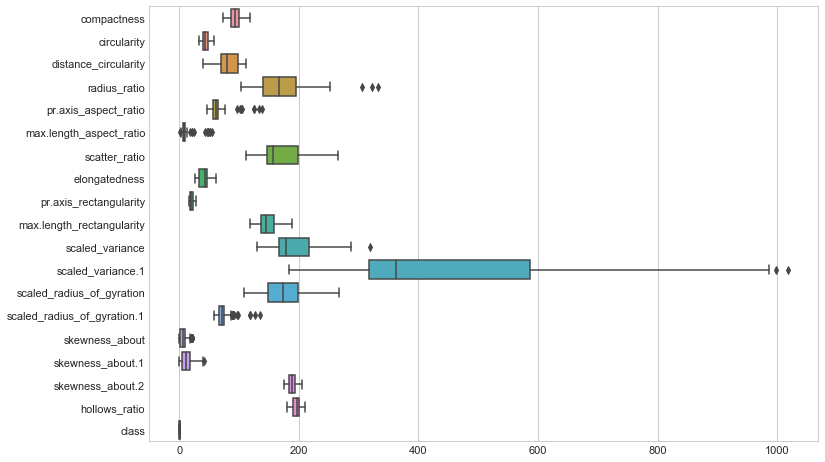

In [74]:
#Summary View of all attribute , The we will look into all the boxplot individually to trace out outliers
fig, ax=plt.subplots(1,1,figsize=(12,8))
ax = sns.boxplot(data=newdf, orient="h")

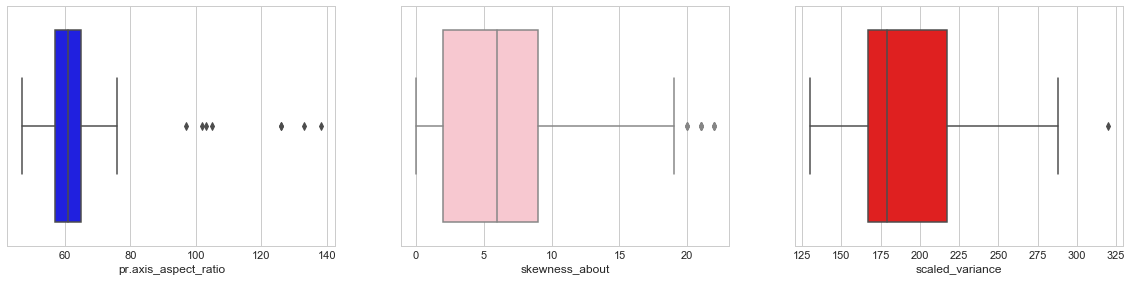

In [77]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['pr.axis_aspect_ratio'], color='blue')

plt.subplot(3,3,2)
sns.boxplot(x= newdf.skewness_about, color='pink')

plt.subplot(3,3,3)
sns.boxplot(x= newdf.scaled_variance, color='red')

plt.show()

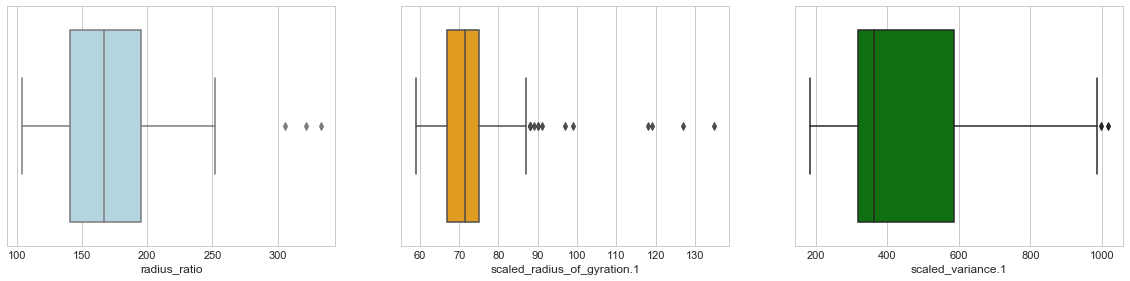

In [78]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['radius_ratio'], color='lightblue')

plt.subplot(3,3,2)
sns.boxplot(x= newdf['scaled_radius_of_gyration.1'], color='orange')

plt.subplot(3,3,3)
sns.boxplot(x= newdf['scaled_variance.1'], color='green')

plt.show()

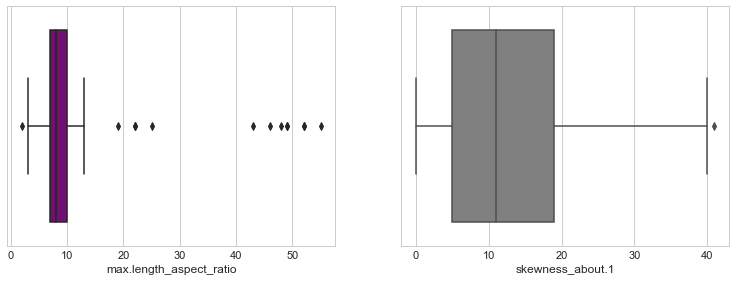

In [79]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['max.length_aspect_ratio'], color='purple')

plt.subplot(3,3,2)
sns.boxplot(x= newdf['skewness_about.1'], color='grey')


plt.show()

#### Observation on boxplots:
pr.axis_aspect_ratio, skewness_about, max_length_aspect_ratio, skewness_about_1,
scaled_radius_of_gyration.1, scaled_variance.1, radius_ratio, skewness_about, scaled_variance.1 are some of the attributes with outliers

### IQR 

In [82]:
newdf.shape

(846, 19)

In [80]:
from scipy.stats import iqr

Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [83]:
cleandf = newdf[~((newdf < (Q1 - 1.5 * IQR)) |(newdf > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape

(813, 19)

### Verification of outliers removal

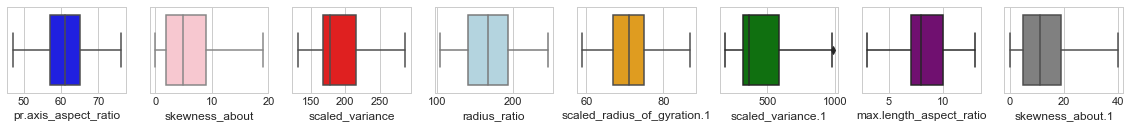

In [84]:
plt.figure(figsize= (20,15))
plt.subplot(8,8,1)
sns.boxplot(x= cleandf['pr.axis_aspect_ratio'], color='blue')

plt.subplot(8,8,2)
sns.boxplot(x= cleandf.skewness_about, color='pink')

plt.subplot(8,8,3)
sns.boxplot(x= cleandf.scaled_variance, color='red')
plt.subplot(8,8,4)
sns.boxplot(x= cleandf['radius_ratio'], color='lightblue')

plt.subplot(8,8,5)
sns.boxplot(x= cleandf['scaled_radius_of_gyration.1'], color='orange')

plt.subplot(8,8,6)
sns.boxplot(x= cleandf['scaled_variance.1'], color='green')

plt.subplot(8,8,7)
sns.boxplot(x= cleandf['max.length_aspect_ratio'], color='purple')

plt.subplot(8,8,8)
sns.boxplot(x= cleandf['skewness_about.1'], color='gray')

plt.show()


#### Note
We can see that all out boxplot for all the attributes which had outlier have been treated and removed. Since no. of outliers were less we opted to remove it. Generally we avoid this as it can lead to info loss in case of large data sets with large no of outliers

## Understanding the relationship between all independent attribute:

Data Correlation: Is a way to understand the relationship between multiple variables and attributes in your dataset. Using Correlation, you can get some insights such as:

One or multiple attributes depend on another attribute or a cause for another attribute.

One or multiple attributes are associated with other attributes.

Spearman and Pearson are two statistical methods to calculate the strength of correlation between two variables or attributes. Pearson Correlation Coefficient can be used with continuous variables that have a linear relationship.

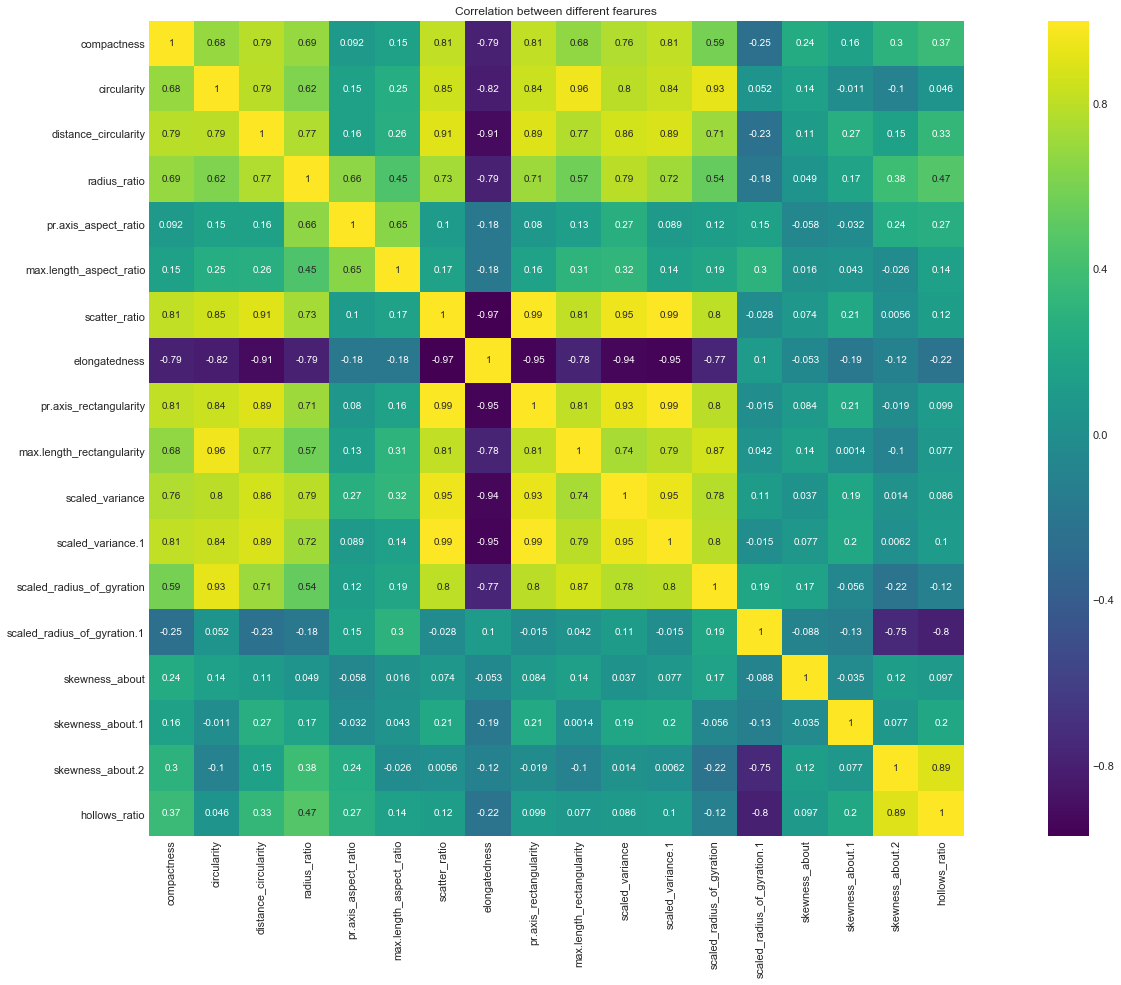

In [87]:
def correlation_heatmap(dataframe,l,w):
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show();
    # Let's Drop Class column and see the correlation Matrix & Pairplot Before using this dataframe for PCA as PCA should only be perfromed on independent attribute
cleandf= newdf.drop('class', axis=1)
#print("After Dropping: ", cleandf)
correlation_heatmap(cleandf, 30,15)

#### Observation

##### Strong/fare Correlation
      - Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.98
      - skewness_about_2 and hollow_ratio seems to be strongly correlated, corr coeff: 0.89
      - ditance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.81
      - compactness & circularity , radius_ratio & pr.axis_aspect_ratio also seems ver averagely correlated with coeff: 0.67.
      - scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated with corr coeff: 0.79
      - pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with coeff: 0.81 
      - scatter_ratio and elongatedness seems to be have strong negative correlation val : 0.97
      - elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  0.95
      
      
##### Little/Poor Correlation

      -max_length_aspect_ratio & radius_ratio have average correlation with coeff: 0.5
      - pr.axis_aspect_ratio & max_length_aspect_ratio seems to have very little correlation
      - scaled_radius_gyration & scaled_radisu_gyration.1 seems to be very little correlated
      - scaled_radius_gyration.1 & skewness_about seems to be very little correlated
      - skewness_about & skewness_about.1 not be correlated
      - skewness_about.1 and skewness_about.2 are not correlated.

### Pairplot Analysis:

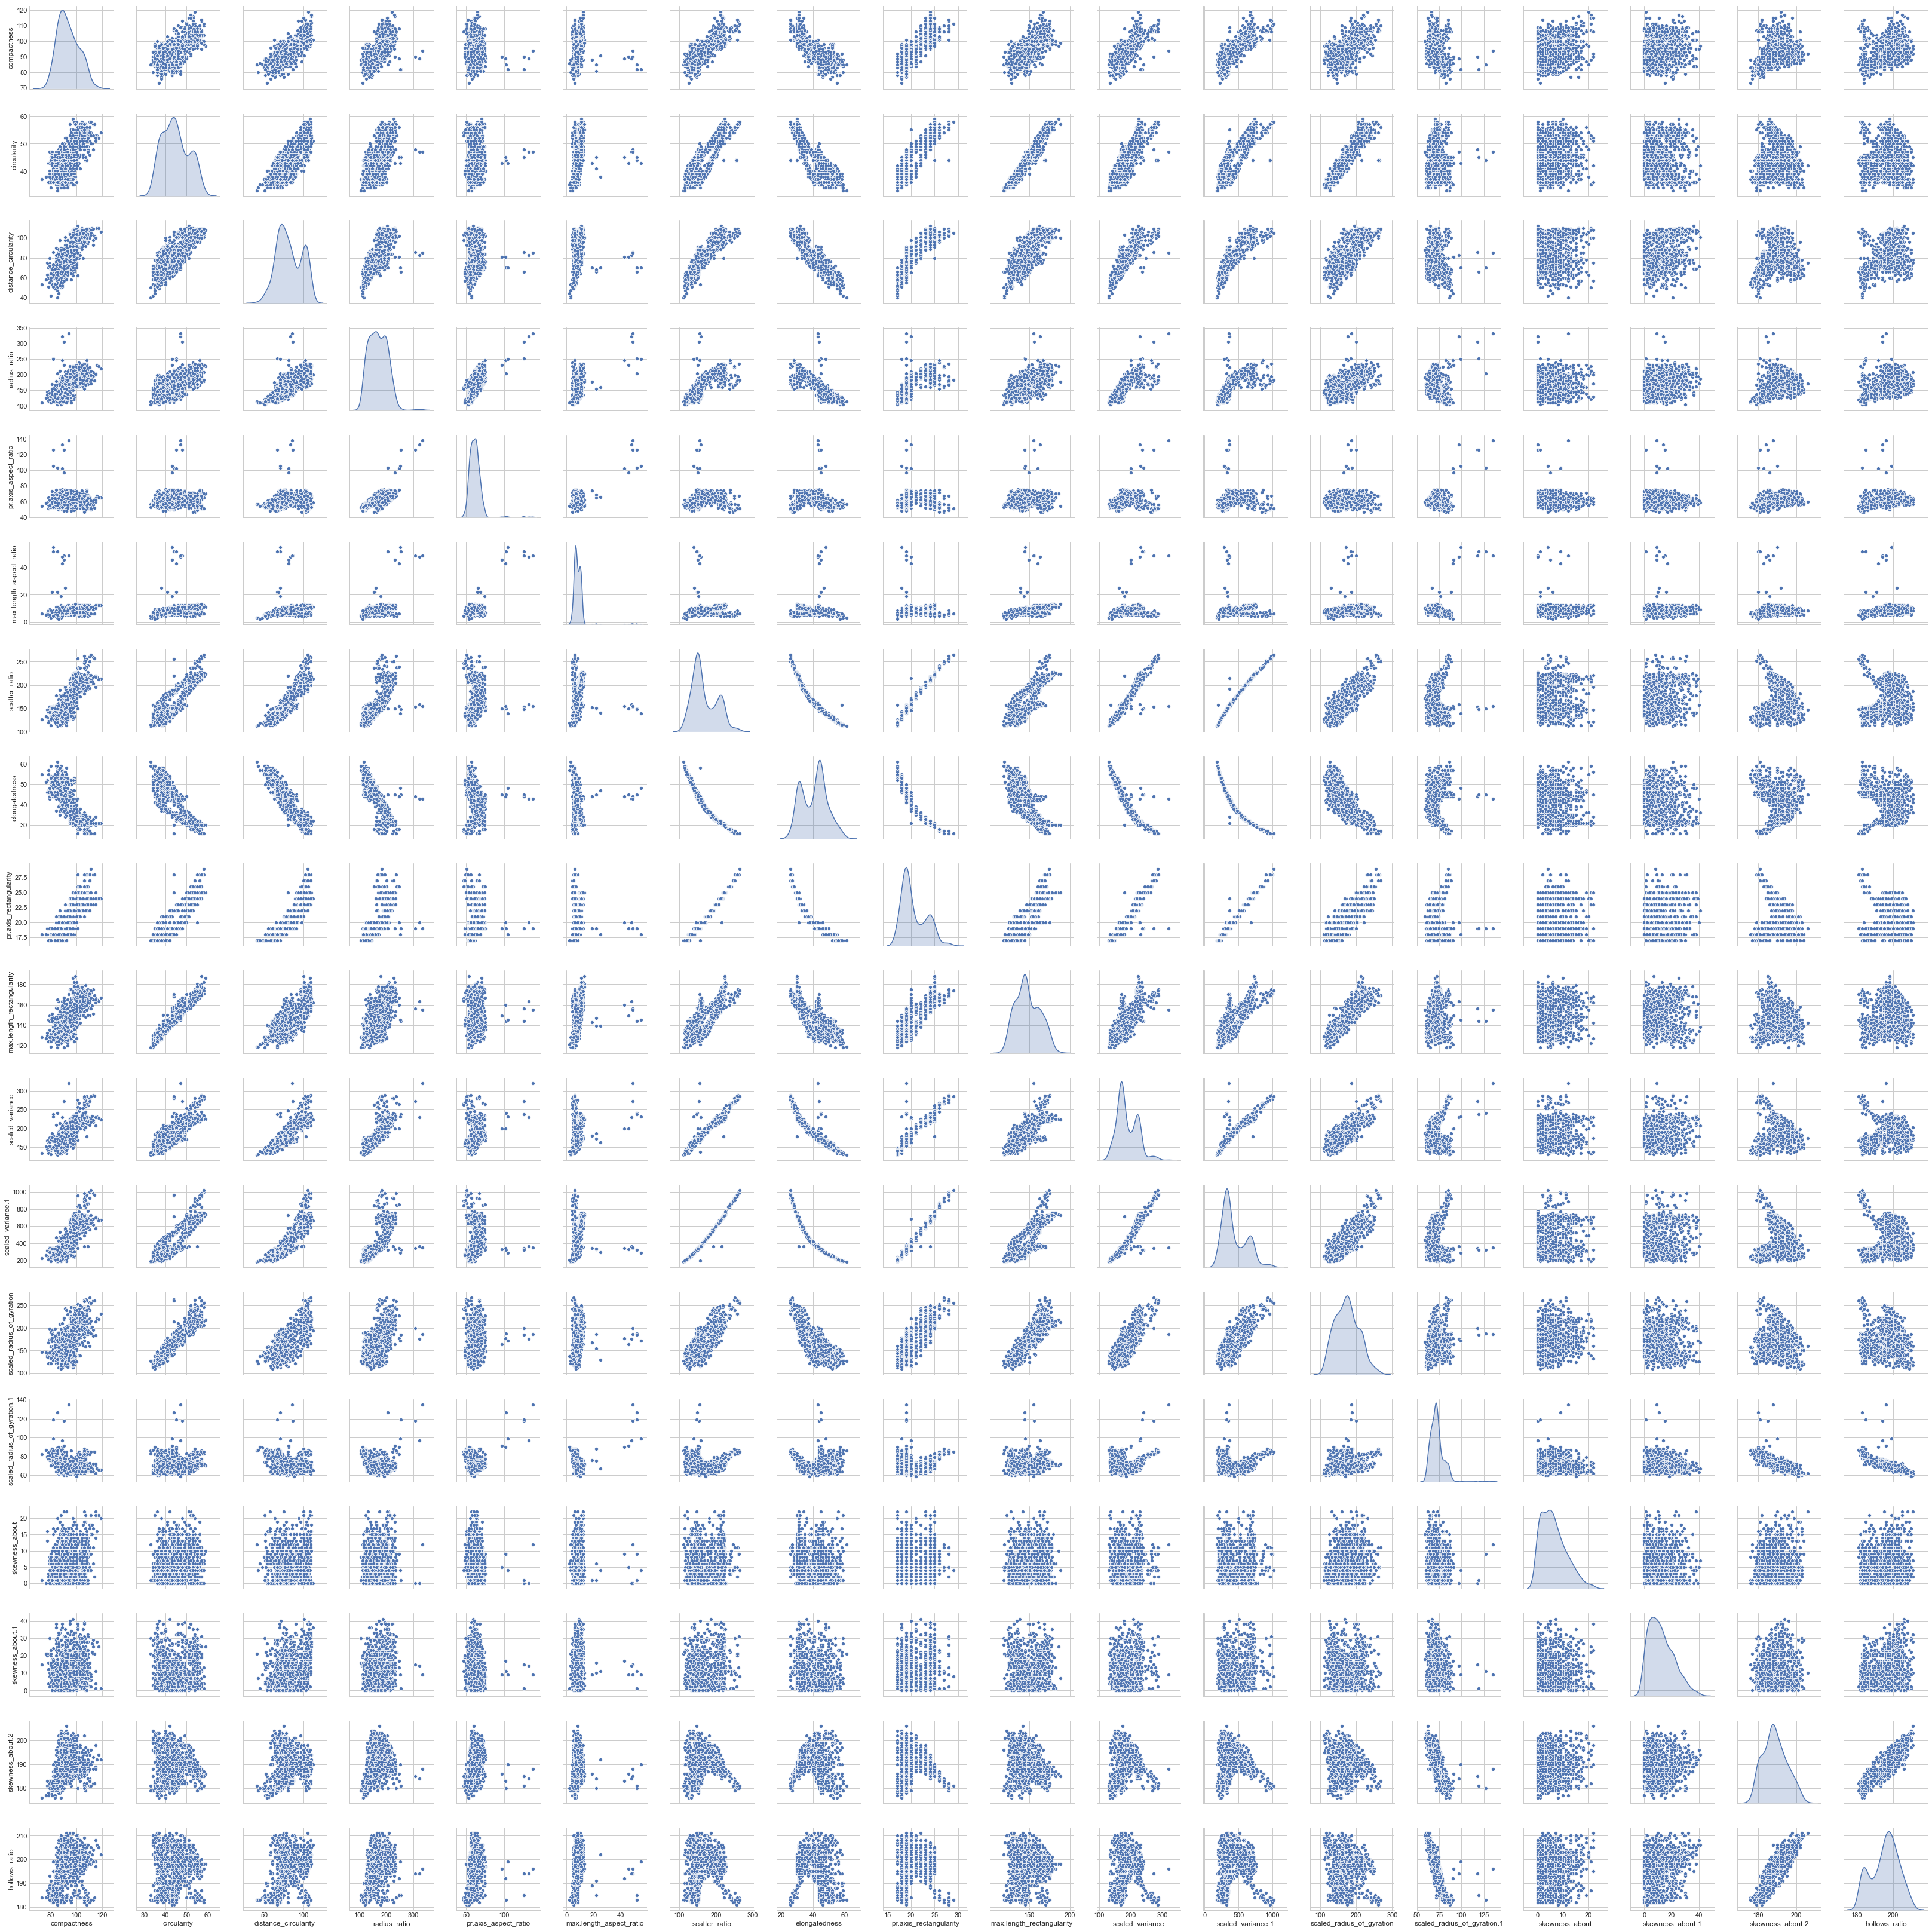

In [88]:
sns.pairplot(cleandf, diag_kind="kde")

##### Quick insights:

As observed in our correlation heatmap our pairplot seems to validate the same. Scaled Variance & Scaled Variance.1 seems to be have very strong positive correlation with value of 0.98. skewness_about_2 and hollow_ratio also seems to have strong positive correation with coeff: 0.89

scatter_ratio and elongatedness seems to be have very strong negative correlation. elongatedness and pr.axis_rectangularity seems to have strong negative correlation 

## Choosing the right attributes which can be the right choice for model building

From above correlation matrix we can see that there are many features which are highly correlated. if we carefully analyse, we will find that many features are there which having more than 0.9 correlation. so we can decide to get rid of those columns whose correlation is +-0.9 or above.There are 8 such columns:

max.length_rectangularity
scaled_radius_of_gyration
skewness_about.2
scatter_ratio
elongatedness
pr.axis_rectangularity
scaled_variance
scaled_variance.1



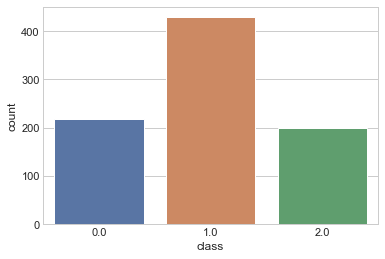

In [89]:
#display how many are car,bus,van. 
newdf['class'].value_counts()

splitscaledf = newdf.copy()
sns.countplot(newdf['class'])
plt.show()

## Principal Component Analysis(PCA):

Basically PCA is a dimension redcuction methodology which aims to reduce a large set of (often correlated) variables into a smaller set of (uncorrelated) variables, called principal components, which holds sufficient information without loosing the the relevant info much.

#### Separate The Data Into Independent & Dependent attribute

In [115]:
#X1= newdf.drop('class',axis=1)
#y1 = newdf['class']
#print("shape of new_vehicle_df_independent_attr::",X.shape)
#print("shape of new_vehicle_df_dependent_attr::",y.shape)

X = newdf.iloc[:,0:18].values
y = newdf.iloc[:,18].values

X

array([[ 95.,  48.,  83., ...,  16., 187., 197.],
       [ 91.,  41.,  84., ...,  14., 189., 199.],
       [104.,  50., 106., ...,   9., 188., 196.],
       ...,
       [106.,  54., 101., ...,   4., 187., 201.],
       [ 86.,  36.,  78., ...,  25., 190., 195.],
       [ 85.,  36.,  66., ...,  18., 186., 190.]])

In [116]:
from sklearn.preprocessing import StandardScaler
#We transform (centralize) the entire X (independent variable data) to normalize it using standardscalar through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)  

### Calculating covariance matrix:
Covariance matrix should be 18*18 matrix

In [117]:
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  

#### Calculating Eigen Vectors & Eigen Values: Using numpy linear algebra function

In [118]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

#### Sort eigenvalues in descending order

In [119]:
# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(9.404602609088705, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.014922058524633, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389657, array([ 0.11992248,  0.02482055,  0.05601433, -0.27507421, -0.64201297,
       -0.5918013 ,  0.09762831, -0.05764844,  0.10951242,  0.0170642 ,
       -0.05632398,  0.10884073,  0.03146365, -0.28627701,  0.11567935,
        0.07528289, -0.00873592, -0.03952427])), (1.1799374684450215, array([-0.07838436, -0.18733741,  0.07120084,  0.04260534, -0.03272571,
       -0.03141473,  0.09574857, -0.0822902 ,  0.0

In [120]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[9.404602609088705, 3.014922058524633, 1.9035250218389657, 1.1799374684450215, 0.9172606328594372, 0.5399926288001127, 0.3588701179293984, 0.2219324559989345, 0.16060859663511767, 0.09185722339516111, 0.06649941176460208, 0.04660059944187704, 0.03579471891303873, 0.027412065737195113, 0.020579287070888724, 0.01791663143223643, 0.010025789847555906, 0.002964457425044782]


In [121]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

#### Plotting The Explained Variance and Princiapl Components

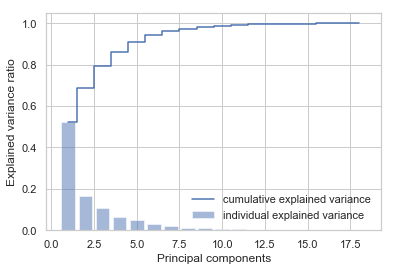

In [122]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

#### Observation
- From above we plot we can clealry observer that 8 dimension() are able to explain 95 %variance of data. 
- so we will use first 8 principal components going forward and calulate the reduced dimensions. 

## Dimensionality Reduction

In [124]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

reduced_pca

0         1          2         3         4         5         6  \
0    0.334162  0.219026  -1.001584 -0.176612 -0.079301 -0.757447 -0.901124   
1   -1.591711  0.420603   0.369034 -0.233234 -0.693949 -0.517162  0.378637   
2    3.769324 -0.195283  -0.087859 -1.202212 -0.731732  0.705041 -0.034584   
3   -1.738598  2.829692  -0.109456 -0.376685  0.362897 -0.484431  0.470753   
4    0.558103 -4.758422 -11.703647 -0.147464 -3.256953 -0.203446  2.671578   
5    5.788913 -3.680602   2.010549  0.771052  0.393432  1.571298  1.266585   
6   -0.773309  2.209779   0.124292 -2.114305  0.192185  0.791615 -0.147108   
7   -2.141137  1.176398  -0.655974 -0.825056  1.242390 -0.643791 -0.137203   
8   -4.458273  3.097744  -0.100556  0.551469  0.568003 -0.278121  0.291617   
9    0.937564  1.827625   0.076417  0.641740  0.404678 -0.343602  0.661844   
10  -3.496120  1.765730  -0.288863  0.423805  0.683214 -0.295118  0.500235   
11  -4.385098  2.429508   0.780084  1.309068 -0.852738 -0.052094  0.327329   
12  -0.824101 -0.023898  -0.451654 -0.299152  0.572621 -0.067019 -1.320285   
13  -1.410988  0.017099   0.118172 -0.144426 -0.504892 -0.635107  0.294670   
14   1.204698  0.867959  -0.541575 -1.192222  1.391408  0.812077 -1.200664   
15   3.806035 -1.299234  -0.179771 -1.033485  1.123398 -0.142831 -0.701051   
16  -5.285376 -1.737289   0.543063  0.856879 -0.159492 -0.090254  0.778860   
17   0.351813  1.596724  -0.497066  0.410143  0.782447  1.718050  0.203570   
18   4.168899 -1.162952   0.401351 -0.121471  0.495700 -0.518158  0.214084   
19   4.138882 -1.185603   0.051057 -0.703379  0.822731 -0.140849 -0.040904   
20  -1.377868 -1.183899  -0.338608 -0.073117  1.671541 -0.257825 -0.797651   
21  -5.114025 -2.259206  -0.079577 -0.585322  0.061602  0.902472  0.263385   
22  -1.156183  2.060654  -0.596965 -1.706903  0.754918  0.569826 -0.437699   
23  -2.758101  0.859532  -0.148215 -0.080619  1.499065  0.045727  0.360061   
24   3.868283  0.401624  -0.558639 -0.006056  1.807500 -0.578300 -0.224125   
25  -1.446173  0.022235  -0.613919 -0.255401  1.391048 -0.898199 -0.352514   
26  -4.836902 -2.352574   0.033921 -0.218285  0.043112  0.771770  0.417622   
27   4.608520 -0.143999  -0.019001  1.688463 -0.016430 -0.675543 -0.155168   
28   1.548311  0.287847   0.090401  0.013082  0.610593  1.778963  0.586569   
29  -3.214755 -2.209652   0.319258  0.796331 -1.410559  0.461943 -0.264400   
..        ...       ...        ...       ...       ...       ...       ...   
816  0.016274 -0.785303  -0.581386  0.196813  0.195267 -1.627901 -0.528587   
817  4.825136  0.616099   0.391465  0.289641 -2.036613 -0.515299 -0.353710   
818  1.551551  0.802066  -0.351121  1.651584 -0.897354  0.544654 -0.076262   
819  1.074145  0.683495   0.065956  0.723625 -1.088896  0.726594 -0.087052   
820 -3.643578 -1.531739   0.416411  0.923812  0.624368 -0.166112  0.850997   
821  4.942559 -0.544091  -0.982453  0.109177  0.173764  0.099021 -0.780395   
822 -1.400054  2.729734  -0.420823 -0.372582  0.817922 -0.402141  0.384361   
823  3.882443  0.564842  -0.033649 -0.226736 -0.684327 -0.262839 -0.598303   
824  4.600146 -0.769824   0.421024 -0.457703 -0.247827 -0.457680  0.455470   
825 -1.690728 -0.838575   0.249256  2.137680 -0.078512 -0.159746  0.087165   
826  1.278951  1.925134  -0.211006 -0.682425  1.904657 -0.434803  0.443712   
827  4.589240 -1.302644   0.715027 -0.449041  0.926804 -1.766182  0.702958   
828 -2.926212 -0.499590   0.882516 -0.397451 -1.048134 -0.643612 -0.086140   
829 -0.278020 -1.571026   0.300845 -0.687990 -0.193341 -1.424553  0.345360   
830 -1.942620  3.315289  -0.359661  1.165810  0.883361  0.614918  0.541667   
831  0.224383  2.137172  -0.478108 -1.424917  0.520468  0.430877 -0.415455   
832  4.218297  0.342006   0.487559 -1.240183 -1.204858  0.583314  0.645731   
833 -0.507041 -0.785039   0.933987 -1.090790  0.035078  0.029312 -0.094998   
834 -4.608957 -2.579611   0.757905 -1.176938 -1.281133  1.475938  0.225546   
835  7.053452 -3.905816   2.015360

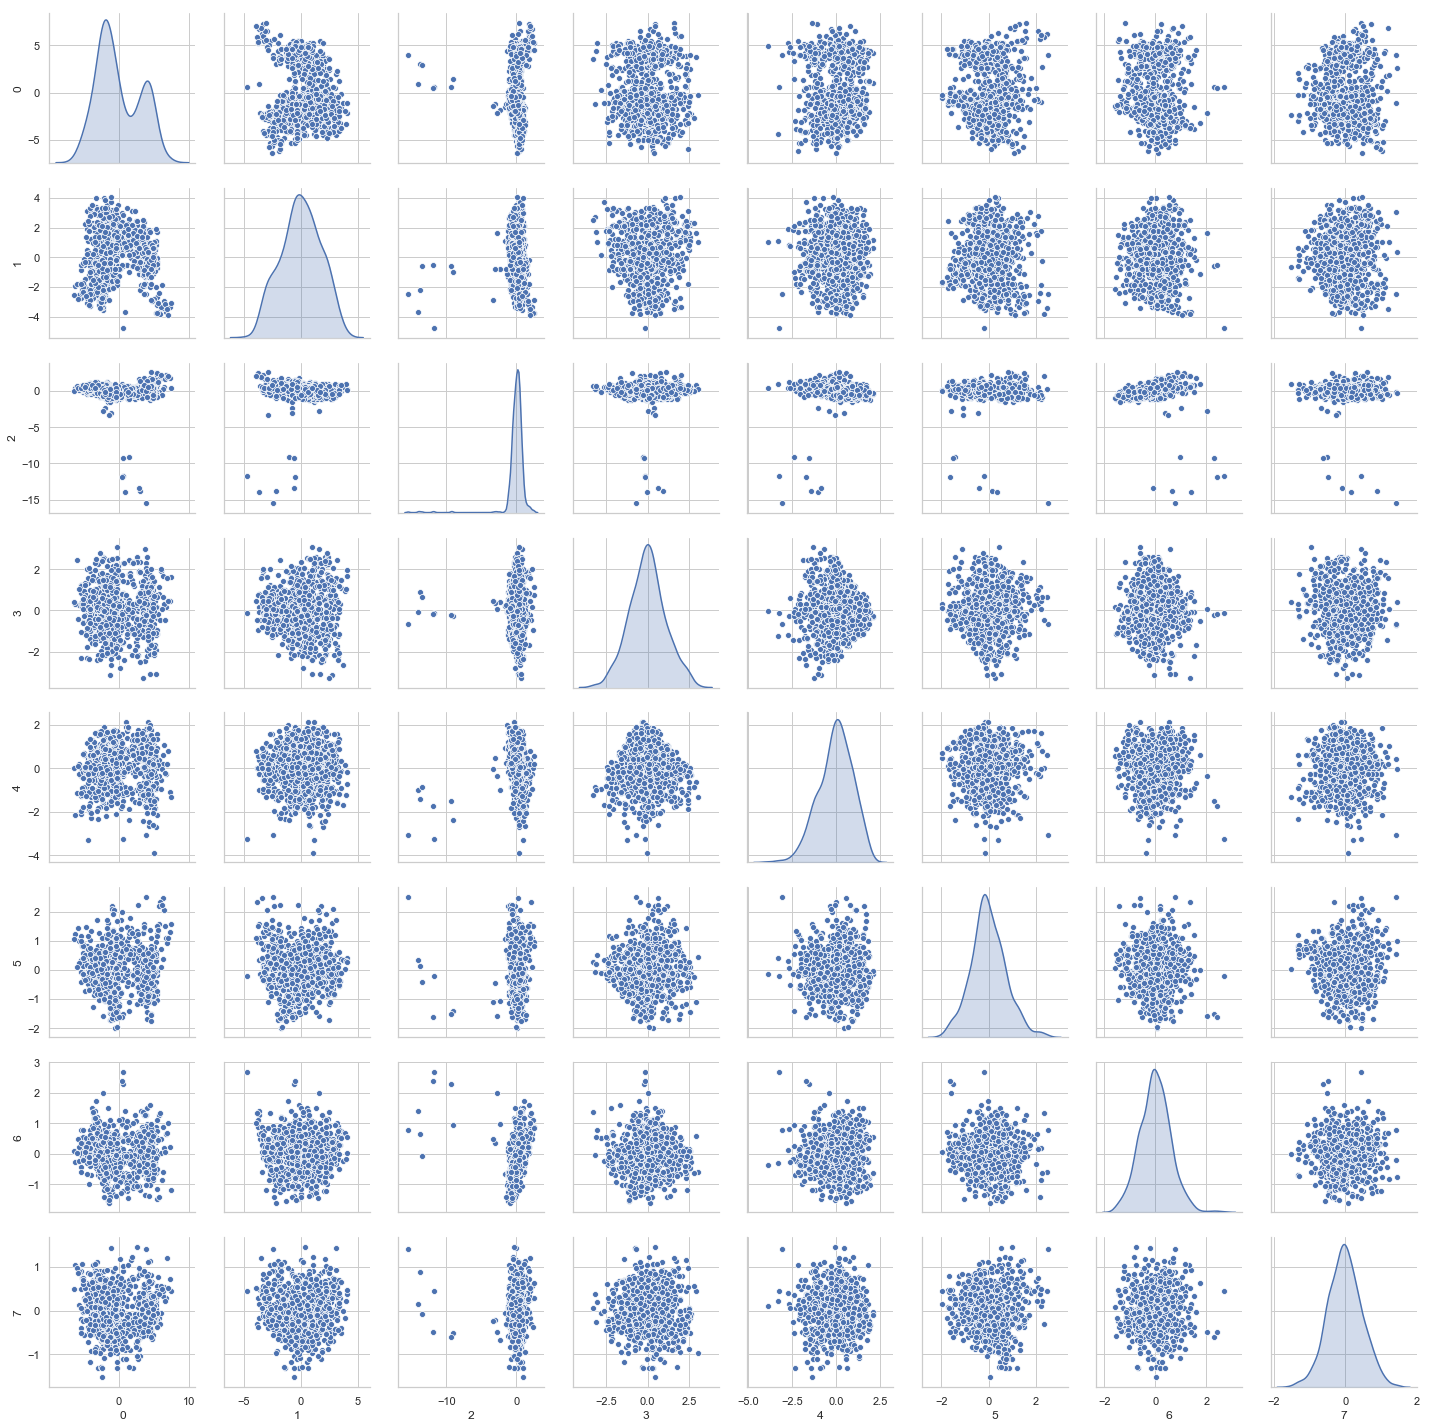

In [125]:
# Let us check The Pairplot Of Reduced Dimension After PCA

sns.pairplot(reduced_pca, diag_kind='kde') 

##### After dimensionality reduction using PCA our attributes have become independent with no correlation among themselves. As most of them have cloud of data points with no lienaer kind of relationship.

## Fitting Model and measuring score simply on Original Data 

In [127]:
#now split the data into 70:30 ratio

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.30,random_state=1)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)
#pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca1,y,test_size=0.30,random_state=1)

#### Fitting SVC model On Original Data

In [128]:
svc = SVC() #instantiate the object

In [129]:
#fit the model on orighinal raw data
svc.fit(Orig_X_train,Orig_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [130]:
#predict the y value
Orig_y_predict = svc.predict(Orig_X_test)

#### Fitting SVC ON PCA Data:

In [131]:
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)

#predict the y value
pca_y_predict = svc1.predict(pca_X_test)

In [132]:
#display accuracy score of both models

print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))

print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Model Score On Original Data  0.952755905511811
Model Score On Reduced PCA Dimension  0.9330708661417323
Before PCA On Original 18 Dimension 0.952755905511811
After PCA(On 8 dimension) 0.9330708661417323


In [ ]:
On training data set we saw that our support vector classifier without performing PCA has an accuracy score of 95 %
But when we applied the SVC model on PCA componenets(reduced dimensions) our model scored 93 %.
Considering that original dataframe had 18 dimensions and After PCA dimension reduced to 8, our model has fared well in terms of accuracy score.

### Confusion Matrix:

Confusion Matrix For : 
 Original Data Set [[ 58   0   1]
 [  1 129   3]
 [  6   1  55]]


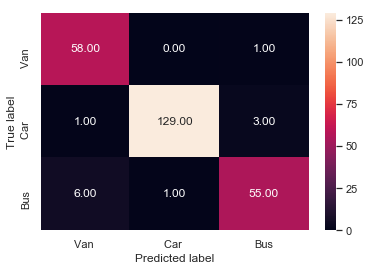

Confusion Matrix For : 
 For Reduced Dimensions Using PCA  [[ 57   2   0]
 [  2 126   5]
 [  1   7  54]]


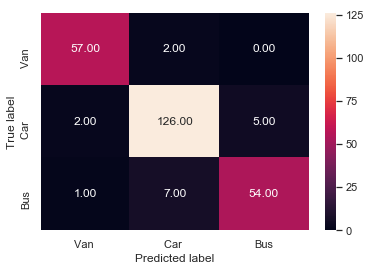

Classification Report For Raw Data: 
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.94        59
         1.0       0.99      0.97      0.98       133
         2.0       0.93      0.89      0.91        62

   micro avg       0.95      0.95      0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254

Classification Report For PCA: 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        59
         1.0       0.93      0.95      0.94       133
         2.0       0.92      0.87      0.89        62

   micro avg       0.93      0.93      0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254



In [133]:
# Calculate Confusion Matrix & PLot To Visualize it

def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype ):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1,2] )
    print("Confusion Matrix For :", "\n",datatype,cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

draw_confmatrix(Orig_y_test, Orig_y_predict,"Van ", "Car ", "Bus", "Original Data Set" )

draw_confmatrix(pca_y_test, pca_y_predict,"Van ", "Car ", "Bus", "For Reduced Dimensions Using PCA ")

#Classification Report Of Model built on Raw Data
print("Classification Report For Raw Data:", "\n", classification_report(Orig_y_test,Orig_y_predict))

#Classification Report Of Model built on Principal Components:

print("Classification Report For PCA:","\n", classification_report(pca_y_test,pca_y_predict))

### Confusion Metric Analysis ON Original Data:
Confusion Matrix For : Original Data Set 

- Our model on original data set has correctly classified 58 van out of 59 actuals vans and has errored only in one case where it has wrongly predicted van to be a bus.  
   - IN case of 133 actual cars our svm model has correcly classified 129 cars. it has wrongly classified 3 cars to be a bus and also 1 car to be a van
   - In case of 62 instances of actual bus , our model has correctly classified 55 buses , It has faltered in classifying wrongly 6 buses to be a van and one bus to be a car. 

### Confusion Metric Analysis ON Reduced Dimesnion After PCA
For Reduced Dimensions Using PCA:

- Out of 59 actual instances of vans our model has correctly predicted 57 vans and errored in 2 instances where it wrongly classified vans to be a car. 
- Out of 133 actuals cars , our mdoel has correclty classified 126 of them to be a  car and faltered in 7 cases where it wrongly classified 5 cars to a bus and 2 cars to be a van. 

- Out of 62 actual bus , our model has correclty classified 54 of them to be a bus. It has faltered in 8 cases where it wrongly classified 7 bus to be a car and 1 bus to be a van.

#### Let's Apply Grid Search & Cross-Validation:To Tune Our Model and Validate The Model's Accuracy Score

In [134]:
import itertools

def classifiers_hypertune(name,rf,param_grid,x_train_scaled,y_train,x_test_scaled,y_test,CV):
    CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=CV, verbose= 1, n_jobs =-1 )
    CV_rf.fit(x_train_scaled, y_train)
    
    y_pred_train = CV_rf.predict(x_train_scaled)
    y_pred_test = CV_rf.predict(x_test_scaled)
    
    print('Best Score: ', CV_rf.best_score_)
    print('Best Params: ', CV_rf.best_params_)
    
    
    
    #Classification Report
    print(name+" Classification Report: ")
    print(classification_report(y_test, y_pred_test))
    
   
    #Confusion Matrix for test data
    draw_confmatrix(y_test, y_pred_test,"Van", "Car", "Bus", "Original Data Set" )
    print("SVM Accuracy Score:",round(accuracy_score(y_test, y_pred_test),2)*100)

In [135]:
#Training on SVM Classifier
from sklearn.model_selection import GridSearchCV
svmc = SVC()

#Let's See What all parameters one can tweak 
print("SVM Parameters:", svmc.get_params())

# Create the parameter grid based on the results of random search 
param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1],  'kernel': ['rbf']},
 ]

param_grid_1 = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

SVM Parameters: {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [136]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid,X_train_std_pca, SplitScale_y_train, X_test_std_pca, SplitScale_y_test,10)

NameError: name 'X_train_std_pca' is not defined